In [33]:
import tensorflow
tensorflow.test.gpu_device_name()

'/device:GPU:0'

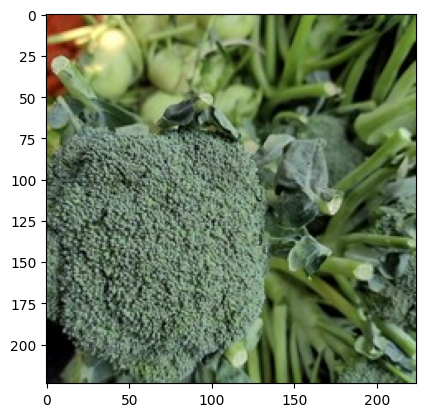

In [34]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('/kaggle/input/vegetable-image-dataset/Vegetable Images/test/Broccoli/1002.jpg', 'r')

imshow(np.asarray(pil_im))

In [35]:
from tensorflow.keras import backend as K
from time import time

# DATA SOURCE --------------------------------------------------

train_data_dir = '/kaggle/input/vegetable-image-dataset/Vegetable Images/train'
validation_data_dir = '/kaggle/input/vegetable-image-dataset/Vegetable Images/validation'
test_data_dir = '/kaggle/input/vegetable-image-dataset/Vegetable Images/test'
image_size = (150, 150)
batch_size = 32

In [36]:
train_ds = tensorflow.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    #validation_split=0.2,
    #subset="training",
    #seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'
)

validation_ds = tensorflow.keras.preprocessing.image_dataset_from_directory(
    validation_data_dir,
    #validation_split=0.2,
    #subset="validation",
    #seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'
)

test_ds = tensorflow.keras.preprocessing.image_dataset_from_directory(
    test_data_dir,
    #validation_split=0.2,
    #subset="validation",
    #seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'
)

train_ds = train_ds.prefetch(buffer_size=32)
validation_ds = validation_ds.prefetch(buffer_size=32)
test_ds = test_ds.prefetch(buffer_size=32)

Found 15000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.
Found 3000 files belonging to 15 classes.


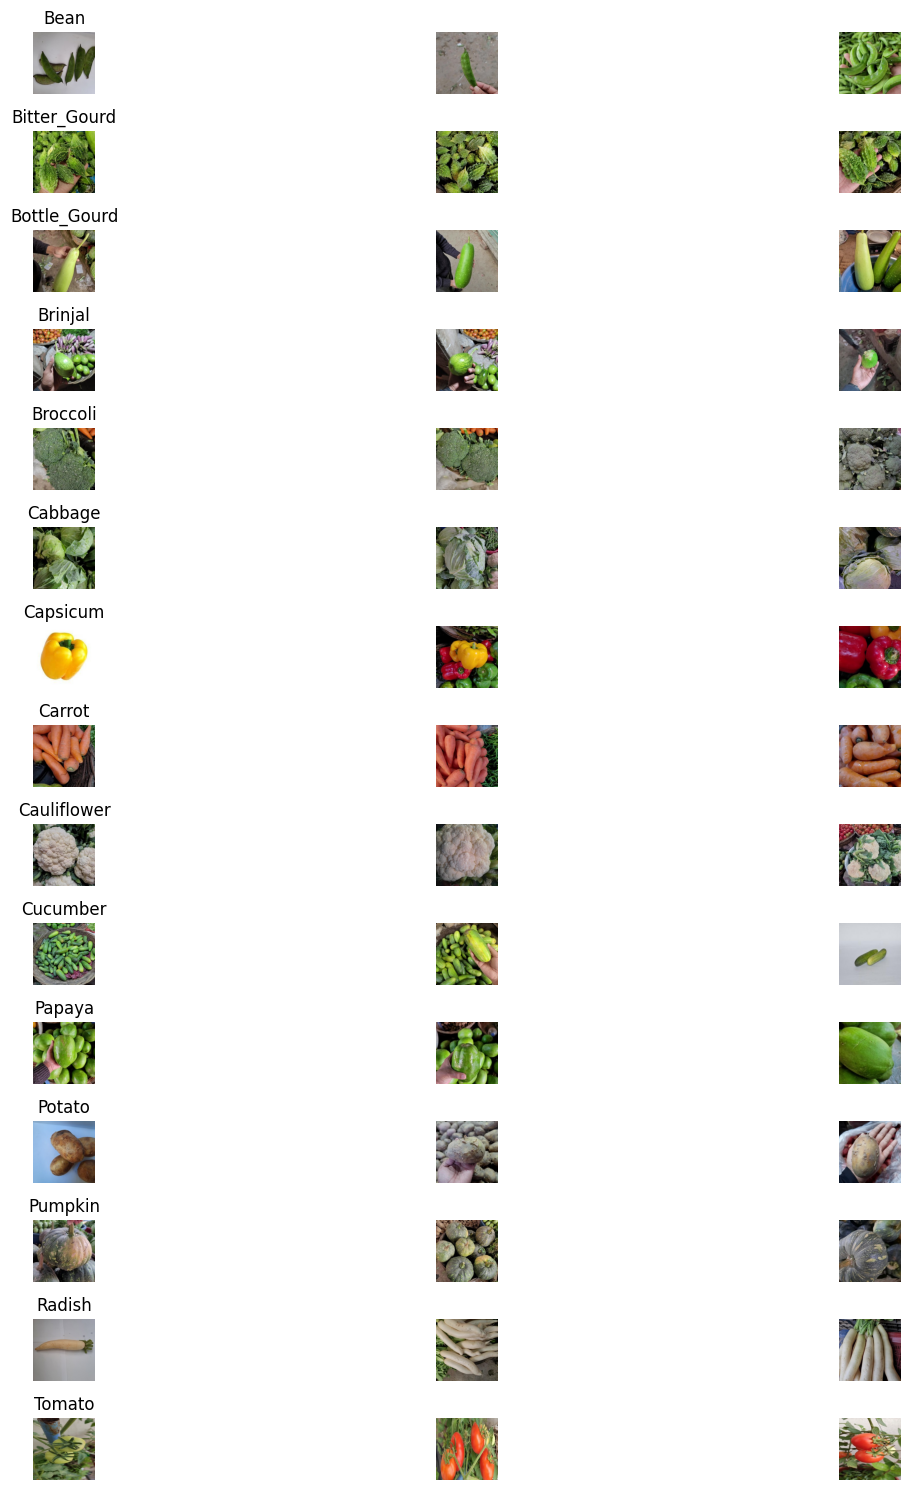

In [38]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

# Ruta al directorio raíz del dataset
directorio_raiz = '/kaggle/input/vegetable-image-dataset/Vegetable Images'

# Nombres de las carpetas de entrenamiento, validación y prueba
carpetas = ['train', 'validation', 'test']

# Nombres de las quince categorías que deseas visualizar
categorias_a_mostrar = ['Bean', 'Bitter_Gourd', 'Bottle_Gourd', 'Brinjal', 'Broccoli',
                        'Cabbage', 'Capsicum', 'Carrot', 'Cauliflower', 'Cucumber',
                        'Papaya', 'Potato', 'Pumpkin', 'Radish', 'Tomato']

# Crear una cuadrícula de subgráficos para mostrar las imágenes
fig, axs = plt.subplots(len(categorias_a_mostrar), len(carpetas), figsize=(15, 15))

# Iterar sobre las carpetas y categorías
for j, carpeta in enumerate(carpetas):
    # Iterar sobre las categorías a mostrar
    for i, categoria in enumerate(categorias_a_mostrar):
        # Obtener la lista de archivos de imágenes en la carpeta y categoría específicas
        directorio_categoria = os.path.join(directorio_raiz, carpeta, categoria)
        archivos_imagenes = os.listdir(directorio_categoria)

        # Seleccionar una imagen al azar de la categoría
        imagen_seleccionada = random.choice(archivos_imagenes)

        # Leer la imagen y mostrarla en el subgráfico correspondiente
        ruta_imagen = os.path.join(directorio_categoria, imagen_seleccionada)
        img = Image.open(ruta_imagen)

        axs[i, j].imshow(img)
        axs[i, j].axis('off')  # Desactivar los ejes para una presentación más limpia

        # Agregar el título en la primera columna
        if j == 0:
            axs[i, j].set_title(categoria)

# Ajustar el diseño y mostrar la previsualización
plt.tight_layout()
plt.show()

# **Image Augmentation**

In [ ]:
#from tensorflow.keras.preprocessing.image import ImageDataGenerator

#train_datagen = ImageDataGenerator(
#        rescale=1./255,
#        rotation_range=15,
#        zoom_range=0.1
#)

#validation_datagen = ImageDataGenerator(
#        rescale=1./255
#)


#train_ds_augmentation = train_datagen.flow_from_directory(
#    train_data_dir,
#    #validation_split=0.2,
#    #subset="training",
#    #seed=1337,
#    target_size=image_size,
#    batch_size=batch_size,
#    class_mode='categorical'
#)

#validation_ds_augmentation = validation_datagen.flow_from_directory(
#    validation_data_dir,
#    #validation_split=0.2,
#    #subset="validation",
#    #seed=1337,
#    target_size=image_size,
#    batch_size=batch_size,
#    class_mode='categorical'
#)

# **The Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Rescaling                    
"""
# MODEL --------------------------------------------------
"""

model = Sequential()
model.add(Rescaling(scale=(1./127.5),offset=-1, input_shape=(150, 150, 3)))

#model.add(Conv2D(16, kernel_size=(3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15, activation='softmax'))

model.summary()

In [ ]:
model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(1e-3),
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = 150

data_generator_with_aug = ImageDataGenerator(preprocessing_function=preprocess_input,
                                   horizontal_flip=True,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2)

train_generator = data_generator_with_aug.flow_from_directory(
        '/kaggle/input/vegetable-image-dataset/Vegetable Images/train',
        target_size=(image_size, image_size),
        batch_size=24,
        class_mode='categorical')

data_generator_no_aug = ImageDataGenerator(preprocessing_function=preprocess_input)
validation_generator = data_generator_no_aug.flow_from_directory(
        '/kaggle/input/vegetable-image-dataset/Vegetable Images/validation',
        target_size=(image_size, image_size),
        class_mode='categorical')

model.fit_generator(
        train_generator,
        steps_per_epoch=3,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=1)

In [ ]:
# TRAINING --------------------------------------------------
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image

epochs = 200

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10, restore_best_weights=True)

history = model.fit(
          train_ds,
          epochs=epochs,
          validation_data = validation_ds,
          callbacks = [es]
)

In [ ]:
# SAVING --------------------------------------------------

model.save("mimodelo.h5")

#  **Evaluación de resultados**

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

results = np.concatenate([(y, model.predict(x=x)) for x, y in validation_ds], axis=1)

labels = np.argmax(results[0], axis=1)
predictions = np.argmax(results[1], axis=1)

cf_matrix = confusion_matrix(labels, predictions)

sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")

#disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix)
#disp.plot()

print(classification_report(labels, predictions, digits = 4))

In [ ]:
from matplotlib import pyplot as plt 

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.plot(history.history['loss'], label='loss')

plt.title('Entrenamiento Vegetables Recognition')

plt.xlabel('Épocas')
plt.ylabel('Exactitud')
plt.legend(loc="upper right")

plt.show()

In [ ]:
# PRODUCTION ----------------------------------------------

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
import tensorflow.keras

# LOADING --------------------------------------------------
#model = tensorflow.keras.models.load_model("mimodelo.h5")

etiquetas=['Habichuelas', 'Calabaza amarga', 'Calabaza vinatera', 'Berenjena', 'Brocoli', 
           'Col', 'Pimiento', 'Zanahoria', 'Coliflor', 'Pepino',
           'Papaya', 'Papa', 'Calabaza', 'Rábano', 'Tomate']
%matplotlib inline

pil_im = Image.open('/kaggle/input/vegetable-image-dataset/Vegetable Images/test/Broccoli/1002.jpg', 'r')
im = np.asarray(pil_im.resize((150, 150)))
imshow(im)
print(im.shape) # La imagen es un array de dimensión: 150x150x3

# El método `predict` hace la predicción de un lote de entradas, no solo una. 
# En el caso de que tengamos solo una entrada deberemos añadirle una dimensión más 
# al array numpy para que la entrada tenga la dimensión: 1x150x150x3

im = im.reshape(1,150,150,3)


print('El vector de salida obtenido: ', model.predict(im))
print('La etiqueta de salida predicha es ', np.argmax(model.predict(im)))
print('Ahora dicho con texto: La etiqueta de salida predicha es ', etiquetas[np.argmax(model.predict(im))])

In [ ]:
# PRODUCTION ----------------------------------------------

#from matplotlib.pyplot import imshow
import numpy as np
#from PIL import Image
import tensorflow.keras

# SAVING --------------------------------------------------
#model.save_model("mimodelo.h5")


# LOADING --------------------------------------------------
#model = tensorflow.keras.models.load_model("mimodelo.h5")

etiquetas=['Habichuelas', 'Calabaza amarga', 'Calabaza vinatera', 'Berenjena', 'Brocoli', 
           'Col', 'Pimiento', 'Zanahoria', 'Coliflor', 'Pepino',
           'Papaya', 'Papa', 'Calabaza', 'Rábano', 'Tomate']
%matplotlib inline
print("ETIQUETA PREDICHA -> ETIQUETA REAL")
for minilote in test_ds:
    prediccion_minilote = model.predict(minilote[0].numpy())
    etiqueta_real_minilote = minilote[1].numpy()
    for y_predicha, y_real in zip(np.round(prediccion_minilote,3), etiqueta_real_minilote):
        if np.argmax(y_predicha) == np.argmax(y_real):
            print(etiquetas[np.argmax(y_predicha)], "->", etiquetas[np.argmax(y_real)])
        else:
            print(etiquetas[np.argmax(y_predicha)], "->", etiquetas[np.argmax(y_real)], "✘")